In [ ]:
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load the data
data=pd.read_csv("/content/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(data.shape)

(891, 12)


In [ ]:
#check for null values
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#handle null values
from sklearn.impute import SimpleImputer
si1=SimpleImputer(missing_values=np.nan,strategy='mean')
data["Age"]=si1.fit_transform(data[["Age"]])
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#null value part 2
si2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data["Cabin"]=si2.fit_transform(data[["Cabin"]])
data["Embarked"]=si2.fit_transform(data[["Embarked"]])
print(data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
#features and target
features=data.drop(["PassengerId","Survived","Name","Ticket","Fare","Cabin","Embarked"],axis='columns')
target=data["Survived"]

In [ ]:
#handle categorical data
new_features=pd.get_dummies(features,drop_first=True)
print(new_features.head())
print(target.head())

   Pclass   Age  SibSp  Parch  Sex_male
0       3  22.0      1      0         1
1       1  38.0      1      0         0
2       3  26.0      0      0         0
3       1  35.0      1      0         0
4       3  35.0      0      0         1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
#train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_features,target,random_state=0,test_size=0.02)


In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(n_estimators=500)
model.fit(x_train,y_train)

BaggingClassifier(n_estimators=500)

In [ ]:
y_pred=model.predict(x_test)
#print(y_test)
#print(y_pred)

In [ ]:
from sklearn.metrics import *
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.89      0.80      0.84        10

    accuracy                           0.83        18
   macro avg       0.83      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18



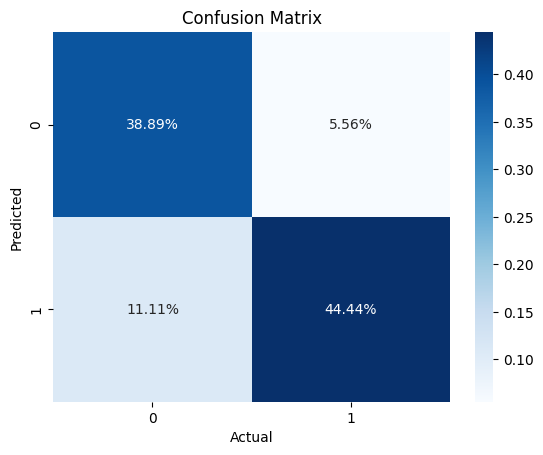

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm/np.sum(cm),annot=True,cmap="Blues",fmt=".2%")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
pclass=int(input("enter passenger class: "))
age=int(input("enter age: "))
sib_sp=int(input("enter no of siblings/spouses: "))
p_arch=int(input("enter no of parents/children: "))
sx=int(input("enter 0-female, 1-male: "))
d=[[pclass,age,sib_sp,p_arch,sx]]
res=model.predict(d)[0]
if res==0:    print("The passenger won't be surviving")
elif res==1:  print("The passenger would survive")

print(model.predict_proba(d))

enter passenger class: 1
enter age: 19
enter no of siblings/spouses: 1
enter no of parents/children: 2
enter 0-female, 1-male: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


The passenger won't be surviving
[[0.772 0.228]]
